In [256]:
def get_sma(prices, nday):
    sma_data = [0] * len(prices)
    for i in range(nday, len(prices)):
        sma_data[i] = sum(prices[i-nday:i]) / nday
    return sma_data

In [257]:
def read_data():
    f = open('COST.csv')
    f.seek(0)           
    all_data = f.read()
    all_data_list = all_data.split('\n')
    data = [x.split(',') for x in all_data_list[1:] if x != '']
    dates = [d[0] for d in data]             
    prices = [float(d[5]) for d in data]
    return dates,prices


In [258]:
def make_plot(a,b,c,dates):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14,5)) 
    plt.title('Cost plot')
    plt.plot(a, linestyle='--', color='red', linewidth=2.0, label='COST') 
    plt.plot(b, color='green', linestyle='-.', linewidth=3.0, label=labels[0])     
    plt.plot(c, 'bo', markersize=1.2, label=labels[1])
    plt.plot(dates, linestyle='-', color='pink', linewidth=2.0, label='dates') 
    plt.legend()                              # show legend of 'FB' and 'FB_SMA3'
    plt.savefig('cost_plot.png')    # 'savefig' needs to happen before 'plt.show', move it below and check the image saved
    plt.show()
    

In [259]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]

In [260]:
def main():    
    dates,prices=read_data()
    period1, period2,  = 10, 50
    data_sma1, data_sma2 = get_sma(prices, period1), sma(prices, period2)
    data_sma1 = zero_to_nan(data_sma1)
    data_sma2 = zero_to_nan(data_sma2)
    labels = ['COST_SMA_%s' % x for x in (period1, period2)]
    make_plot(prices,data_sma1,data_sma2,dates)

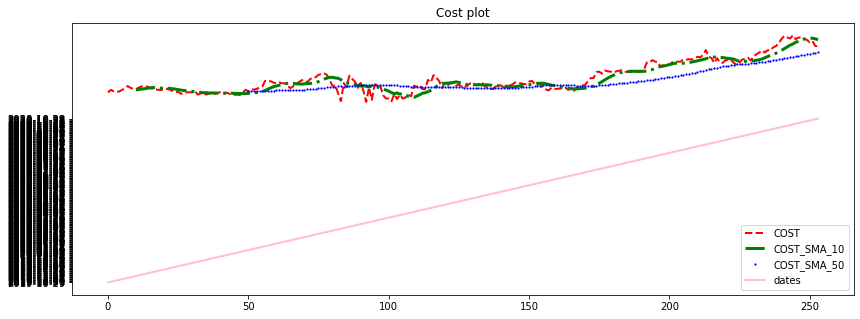

In [261]:
main()